In [1]:
import matplotlib.pylab as plt
import pickle
import numpy as np
import os

In [2]:
import pandas as pd

In [3]:
import ising

In [4]:
plt.style.use('default')
plt.rc('figure', figsize = (15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [5]:
sizes = [ 2, 4, 8, 16]
mcsteps =[1e4, 1e5]

In [6]:
ising.main(sizes=sizes, mcsteps=mcsteps, TF = 6)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [7]:
from itertools import product, cycle

In [8]:
results = {s: {} for s in sizes}
for size, resultsize in results.items():
    resultsize.update({nsteps: {} for nsteps in mcsteps})
for size, steps in product(sizes, mcsteps):
    results[size][steps] = pd.read_csv(f'results_{size}x{size}_{steps}.dat', header=0)

In [9]:
markersymbols = ['o','s','d','^', 'P', 'X', 'h', '*']
linecolors = ['blue', 'red', 'orange', 'steelblue', 'purple', 'maroon']

In [10]:
import matplotlib.lines as mlines

In [11]:
def plot_convergence_size_steps(results, observable = 'Emean',
                               symbol = 'E'):
    fig, ax = plt.subplots()
    for j, (size, resultsize) in enumerate(results.items()):
        for i, (nsteps, resultsizestep) in enumerate(resultsize.items()):
            ax.plot(
                resultsizestep['T'], 
                resultsizestep[observable],
                '-', marker=markersymbols[i],markeredgecolor='k',markersize=8, color=linecolors[j])
    ax.set_ylabel(fr'$\langle {symbol} \rangle$ / per spin')
    ax.set_xlabel('T')
    sizes_handles = [mlines.Line2D([],[],linestyle='-', color = linecolors[i]) for i, size in enumerate(results.keys())]
    sizes_labels = [f'n={size}' for i, size in enumerate(results.keys())]
    nsteps_handles = [mlines.Line2D([],[],marker=markersymbols[i], color = 'k') for i, mcstep in enumerate(mcsteps)]
    nsteps_labels = [f'{n:.1e} mcsteps' for n in mcsteps]
    ax.legend(sizes_handles+nsteps_handles, sizes_labels+nsteps_labels)
    return fig,ax

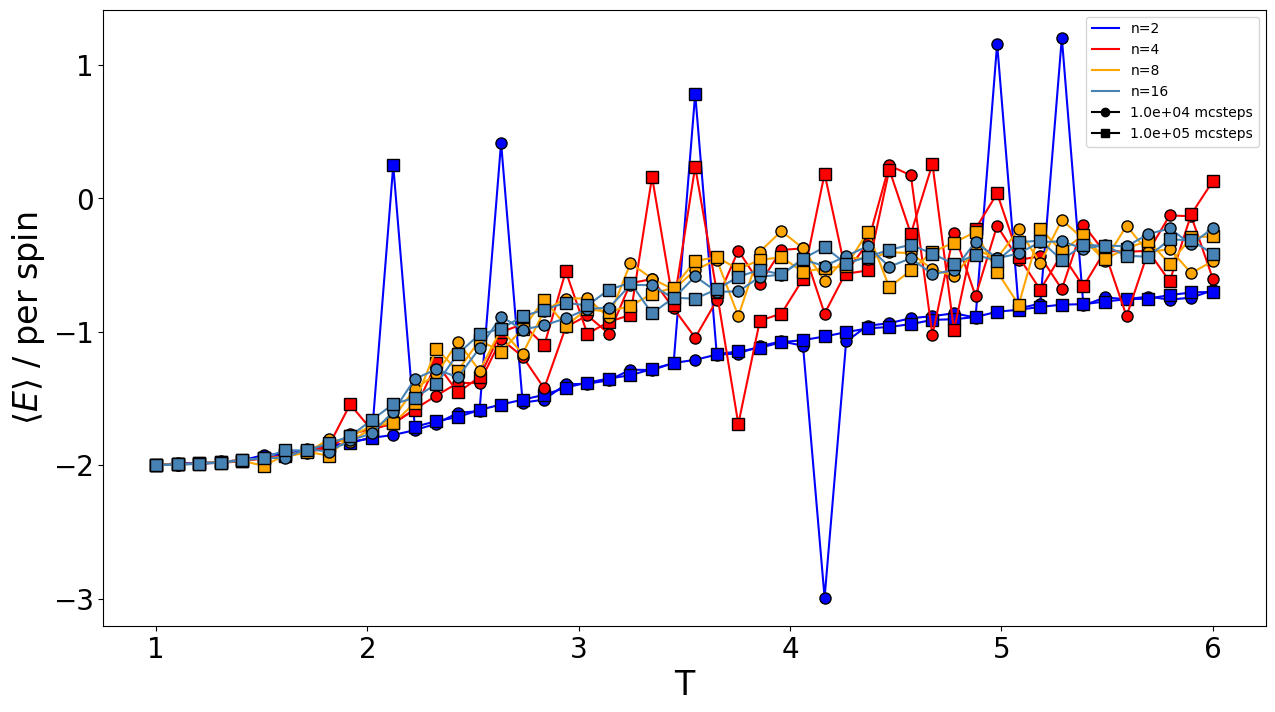

In [12]:
fig, ax = plot_convergence_size_steps(results, observable='Emean')
#ax.set_ylim([-2.1, 0.2])

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:xlabel='T', ylabel='$\\langle |M| \\rangle$ / per spin'>)

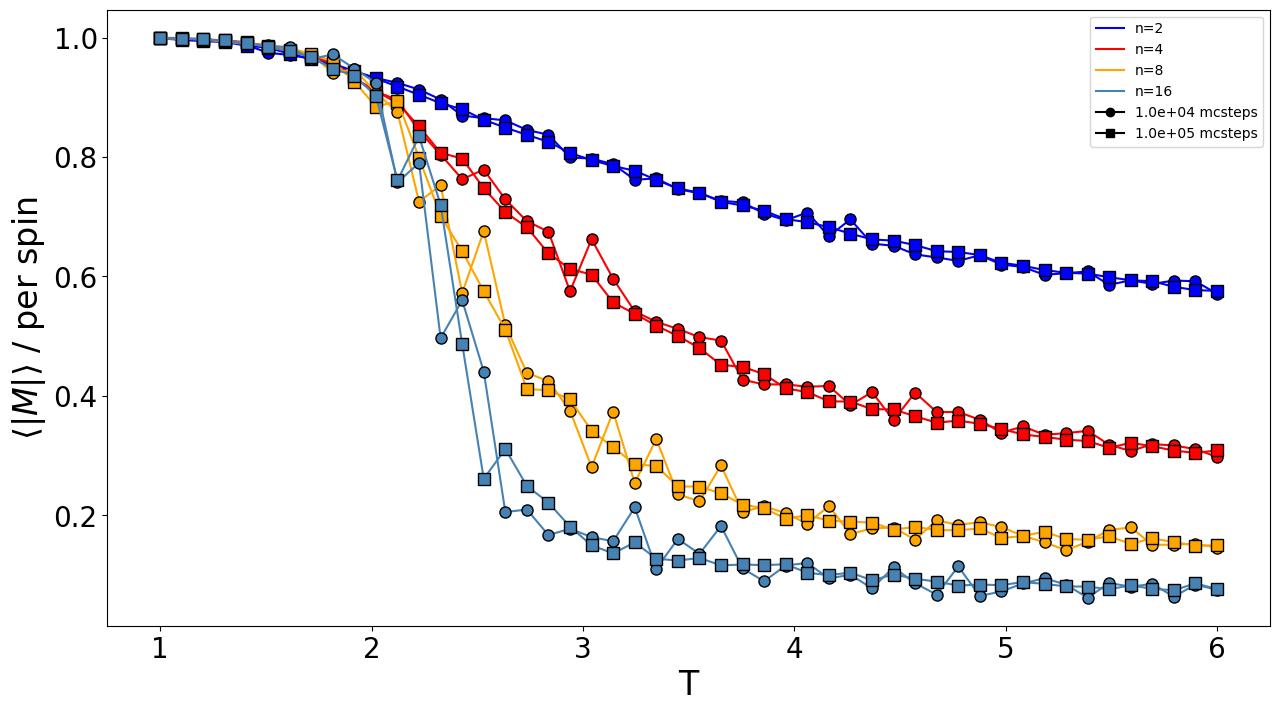

In [13]:
plot_convergence_size_steps(results, 'MabsMEAN', symbol='|M|')

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:xlabel='T', ylabel='$\\langle C_v \\rangle$ / per spin'>)

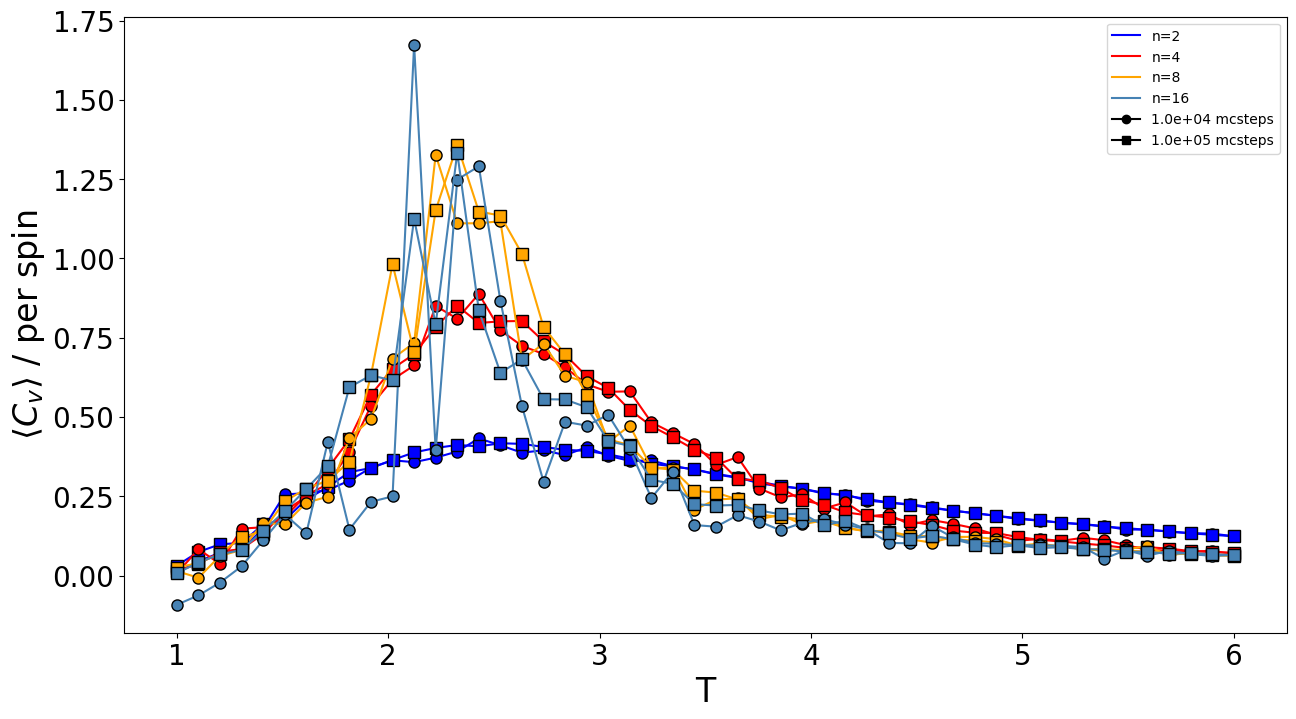

In [14]:
plot_convergence_size_steps(results, observable='CV', symbol='C_v')

Hay dos tipos de susceptibilidad:
$$ \chi = \dfrac{\langle M^2 \rangle - \langle M \rangle ^2}{k_B T} $$
$$ \chi '  = \dfrac{\langle M^2 \rangle - \langle |M| \rangle ^2}{k_B T} $$

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:xlabel='T', ylabel='$\\langle \\chi \\rangle$ / per spin'>)

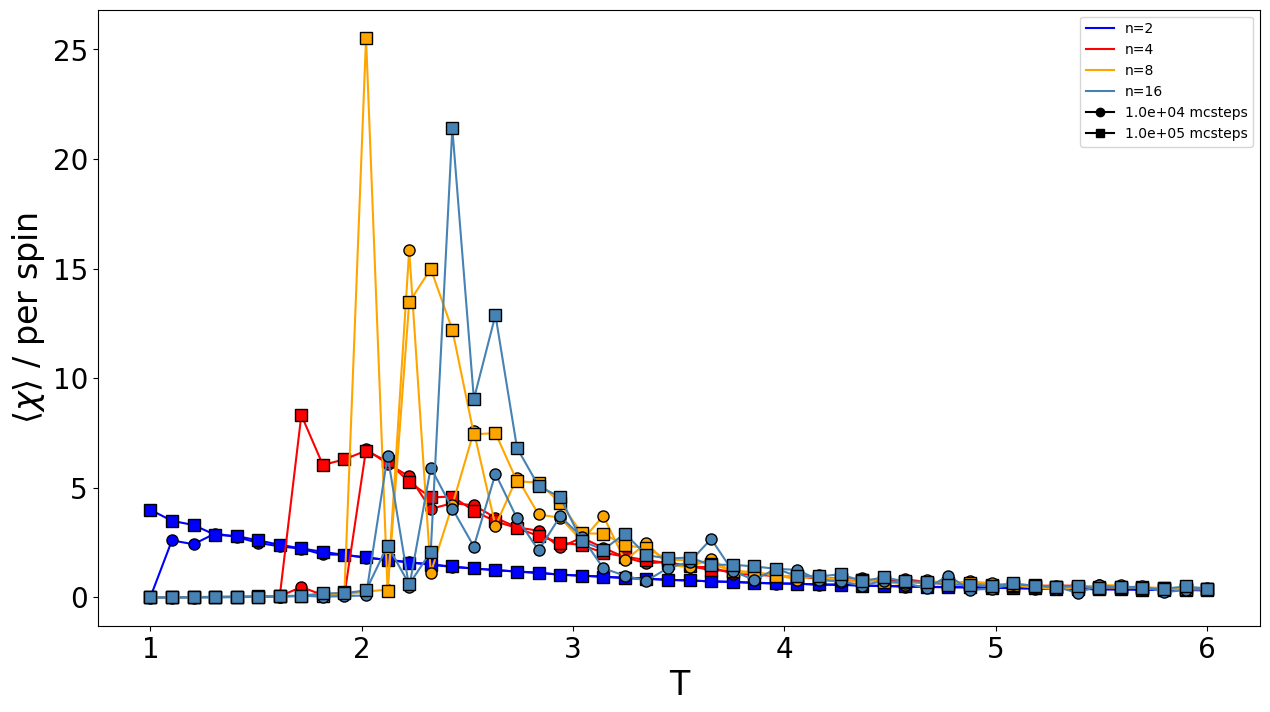

In [15]:
plot_convergence_size_steps(results, observable='X', symbol = '\chi')

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:xlabel='T', ylabel="$\\langle \\chi '  \\rangle$ / per spin">)

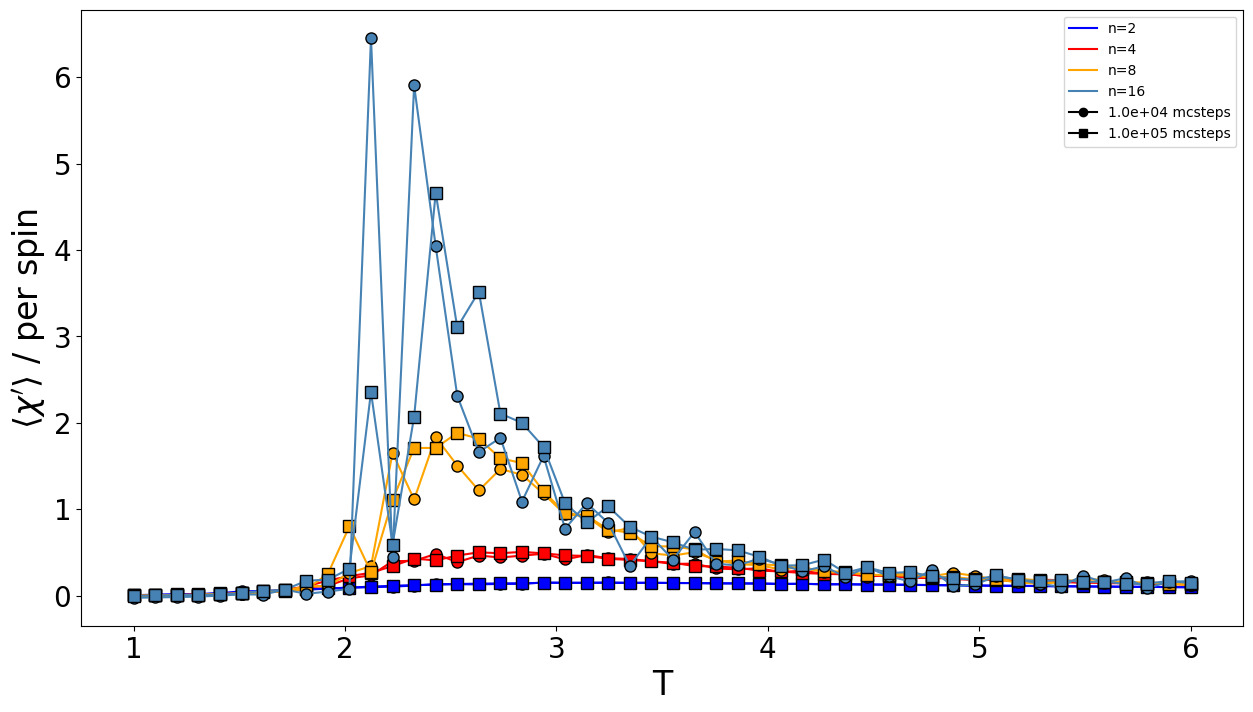

In [16]:
plot_convergence_size_steps(results, observable='Xp', symbol = '\chi \' ')

# Comparación para solución teórica 2x2 

In [17]:
def compare_2x2_teorico(observable, symbol):
    plt.plot (results['teorico']['T'],results['teorico'][observable], 'k', lw = 5, label='teórico 2x2')
    for (size, result), marker in zip(results[2].items(), markersymbols[:len(results[2])]):
        plt.plot (result['T'], result[observable], marker+'--r', markeredgecolor='k', label=f'{size}')
    plt.legend()
    plt.ylabel(fr'$\langle {symbol} \rangle$')
    plt.xlabel (r'$\dfrac{T}{T_c}$')

In [18]:
results['teorico'] = {} 

In [19]:
results['teorico']['T'] =results[2][1e4]['T']

In [20]:
beta = 1/results['teorico']['T']

In [21]:
teoricos = ising.SolucionTeorica2x2(beta, 1)

In [22]:
results['teorico'].update({'Emean': teoricos.emean()})

In [23]:
results['teorico'].update({'E2mean': teoricos.e2mean()})

In [24]:
results['teorico'].update({'MabsMEAN': teoricos.mmean()})

In [25]:
results['teorico'].update({'M2acum': teoricos.m2mean()})

In [26]:
results['teorico']['CV'] = (results['teorico']['E2mean']/4 - results['teorico']['Emean']**2)*beta**2*4

In [27]:
results['teorico']['Xp'] = (results['teorico']['M2acum']/4 - results['teorico']['MabsMEAN']**2)*beta*4

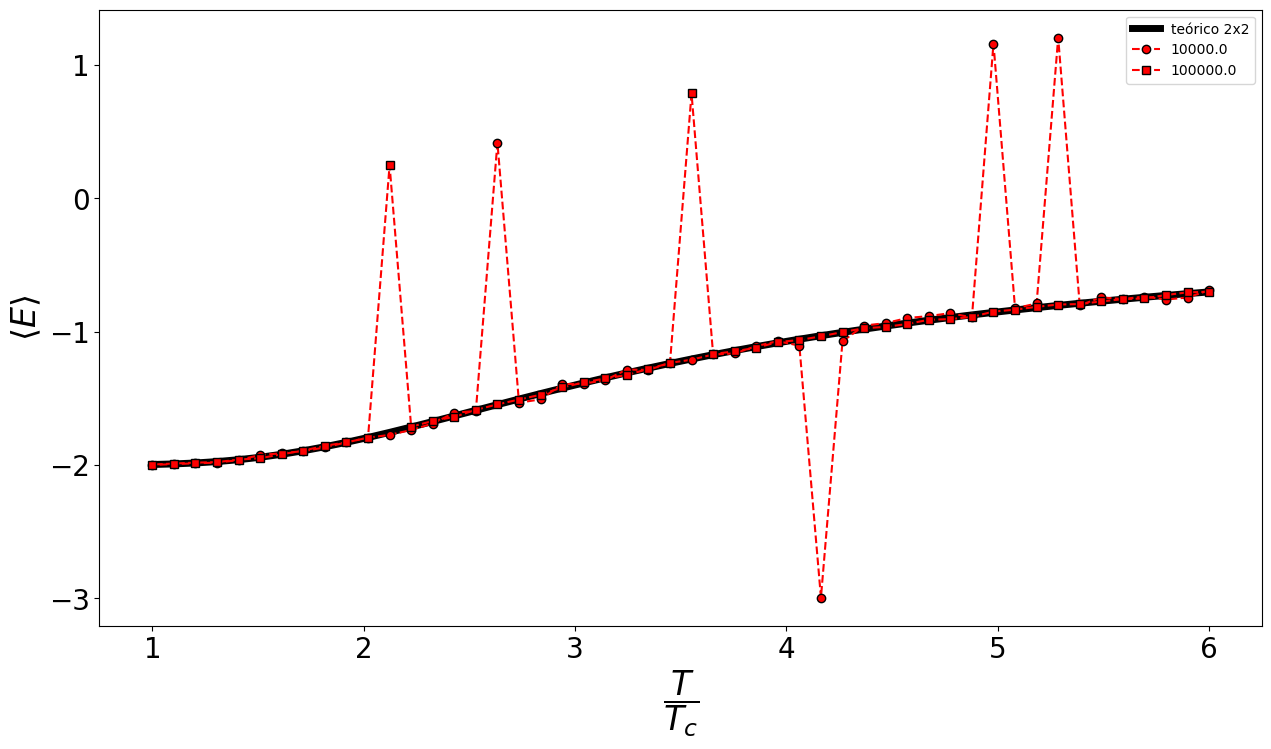

In [28]:
compare_2x2_teorico('Emean', 'E')

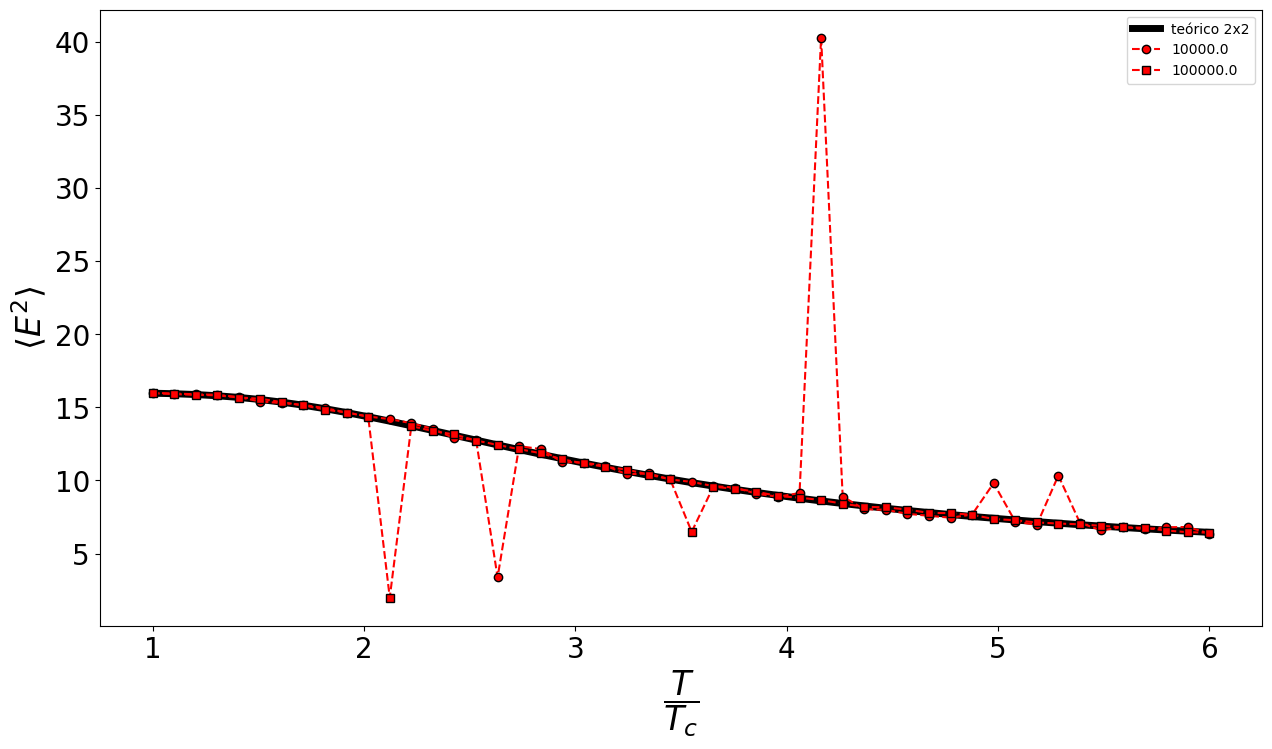

In [29]:
compare_2x2_teorico('E2mean', 'E^2')

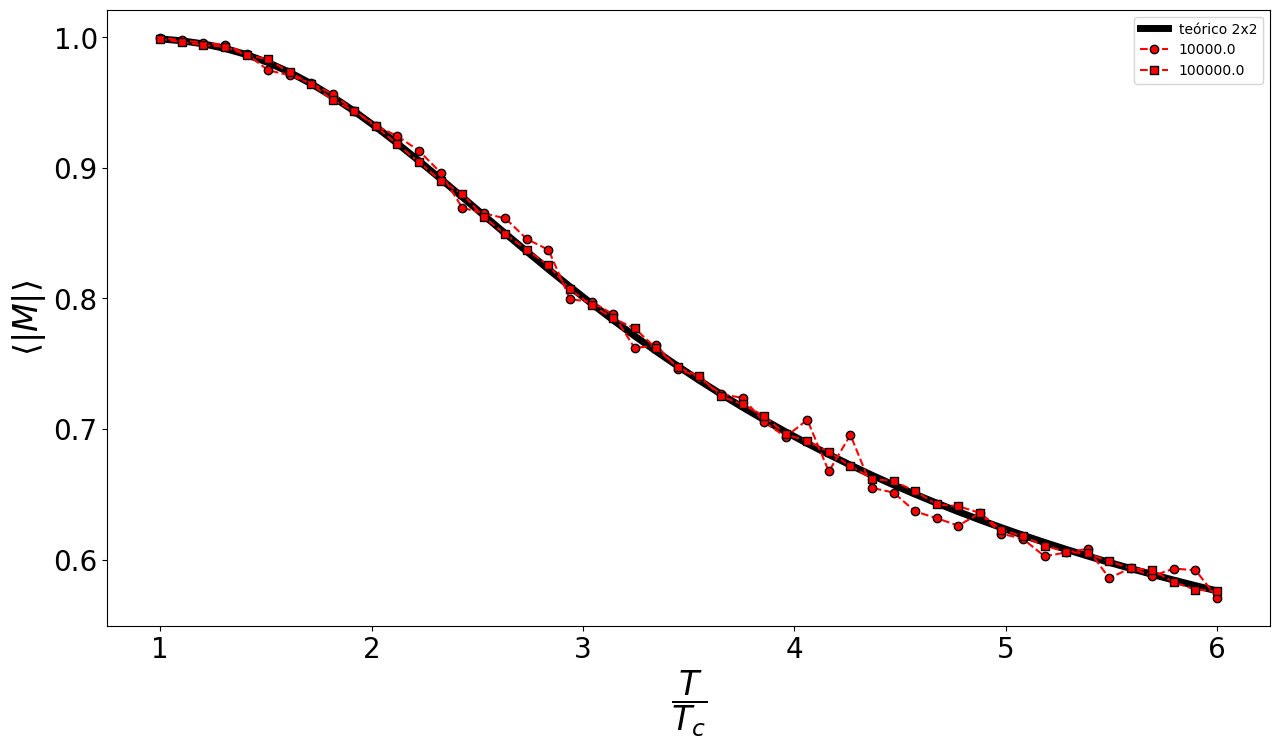

In [30]:
compare_2x2_teorico('MabsMEAN', '|M|')

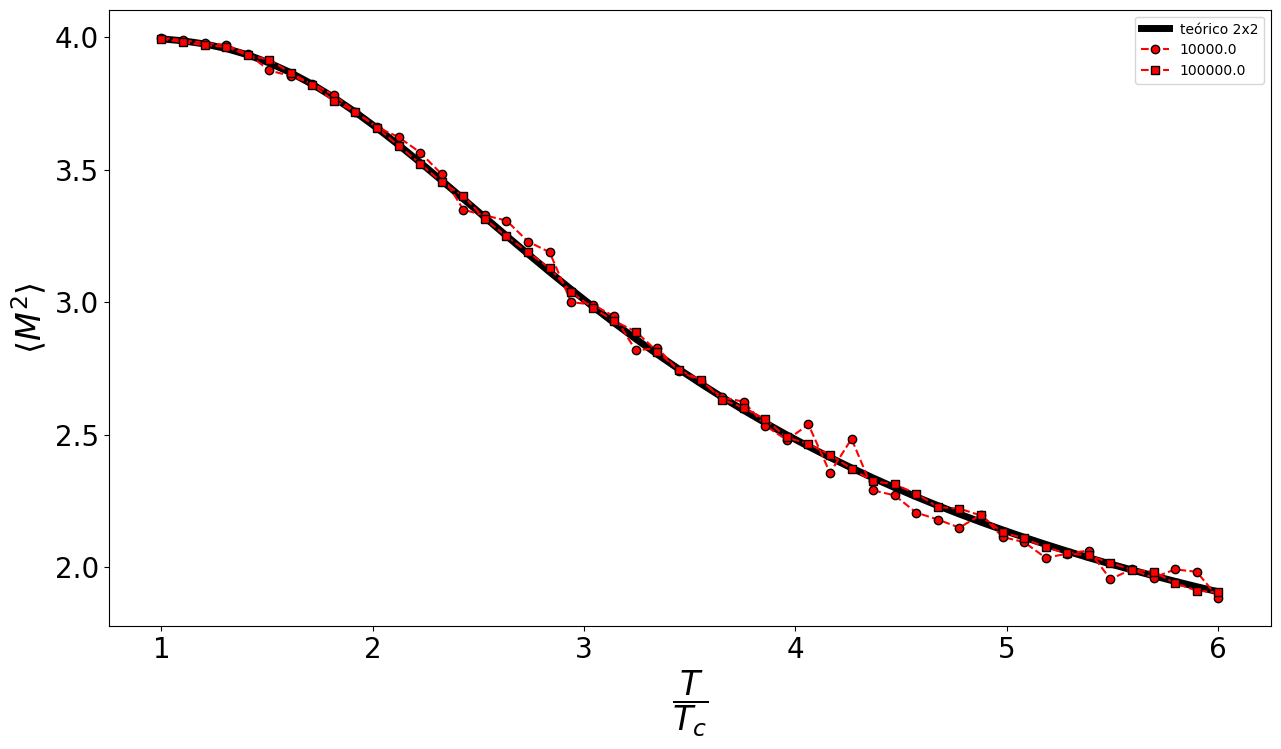

In [31]:
compare_2x2_teorico('M2acum', 'M^2')

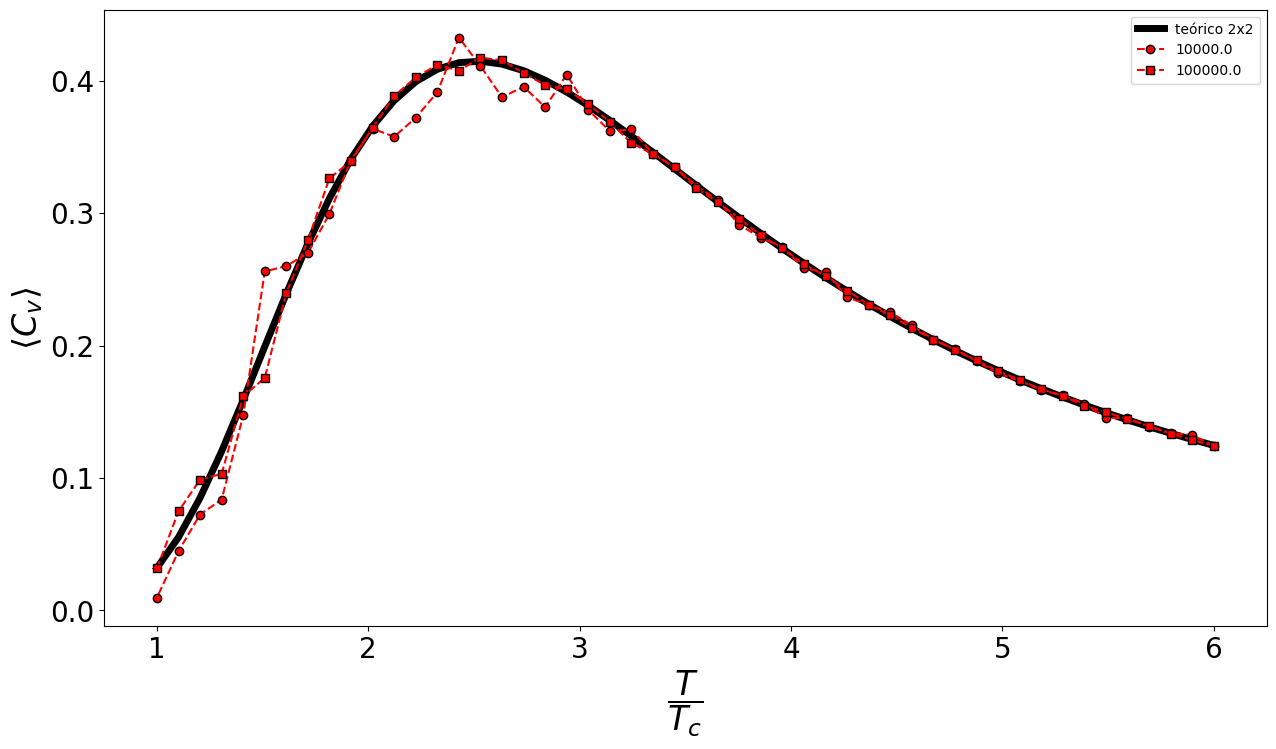

In [32]:
compare_2x2_teorico('CV', 'C_v')

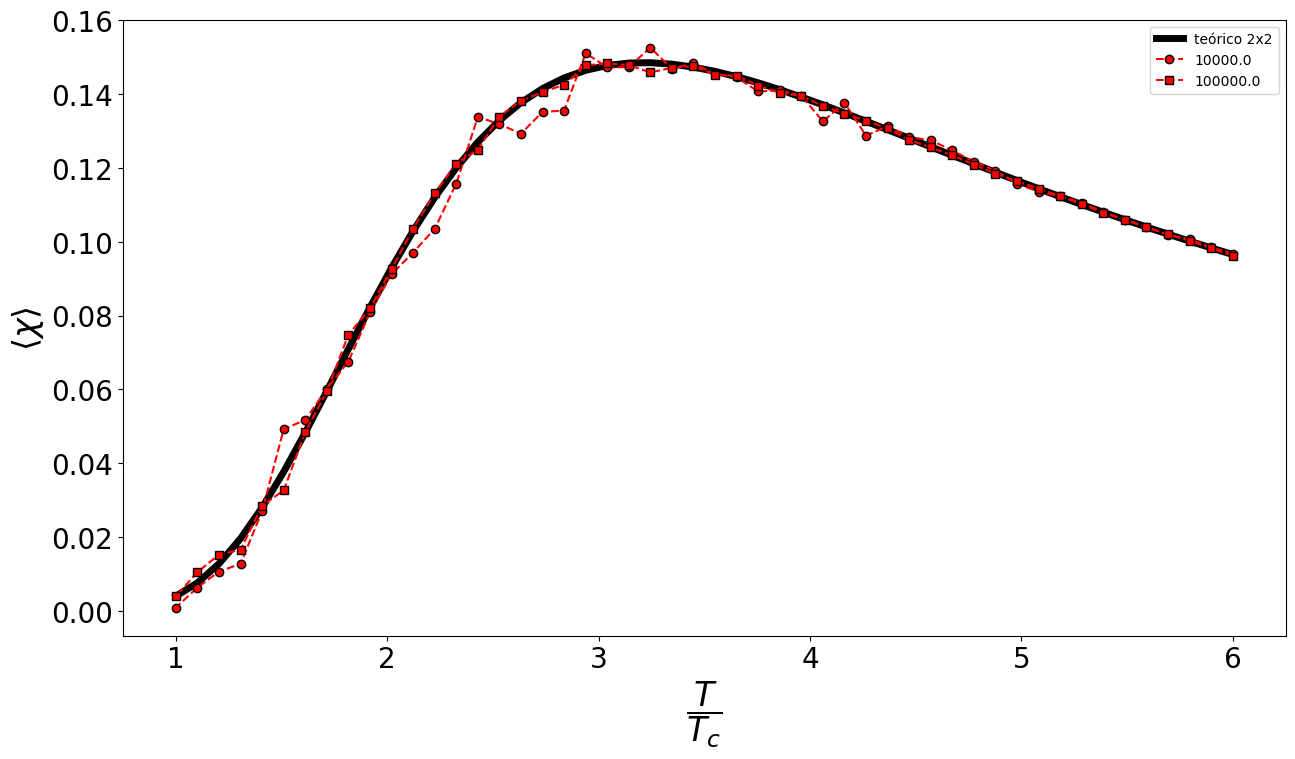

In [33]:
compare_2x2_teorico('Xp', '\chi')